# Plot Incumbent Training Process against baseline

In [29]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

In [30]:
database_name = "fehring_growing_nn_new_seeded"

In [31]:
baseline_depth_1_callback_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="smac_callbacks")
baseline_depth_1_training_process_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline", logtable_name="training_process")

2024-08-14 10:46:11,444  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-14 10:46:11,444  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-14 10:46:11,445  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-14 10:46:11,445  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-14 10:46:11,445  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-14 10:46:11,445  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-14 10:46:11,445  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps


2024-08-14 10:46:11,446  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-14 10:46:11,446  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-14 10:46:11,446  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-08-14 10:46:11,446  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-08-14 10:46:11,447  | py-experimenter - WARNING  | No values given for keyfield total_timesteps
2024-08-14 10:46:11,447  | py-experimenter - WARNING  | No values given for keyfield smac_budget
2024-08-14 10:46:11,447  | py-experimenter - INFO     | Found 13 keyfields
2024-08-14 10:46:11,447  | py-experimenter - INFO     | Found 2 resultfields
2024-08-14 10:46:11,448  | py-experimenter - INFO     | Found 5 logtables
2024-08-14 10:46:11,448  | py-experimenter - INFO     | Found logtable net2deeper_budget200__configurations
2024-08-14 10:46:11,448  | py-experimenter - INFO     | Found l

In [32]:
baseline_depth_2_callback_data = get_logtable(database_name=database_name, table_name="incumbent_gen_2_layers", logtable_name="smac_callbacks")
baseline_depth_2_training_process_data = get_logtable(database_name=database_name, table_name="incumbent_gen_2_layers", logtable_name="training_process")

2024-08-14 10:46:29,337  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-14 10:46:29,338  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-14 10:46:29,339  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-14 10:46:29,339  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-14 10:46:29,339  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-14 10:46:29,339  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-14 10:46:29,339  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-14 10:46:29,340  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-14 10:46:29,340  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-14 10:46:29,340  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [33]:
baseline_depth_4_callback_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline_4", logtable_name="smac_callbacks")
baseline_depth_4_training_process_data = get_logtable(database_name=database_name, table_name="bb_net2deeper_baseline_4", logtable_name="training_process")

2024-08-14 10:46:43,026  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-14 10:46:43,027  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-14 10:46:43,027  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-14 10:46:43,028  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

In [34]:
net2deeper_smac_callback_data = get_logtable(database_name=database_name, table_name="net2deeper_budget200_final", logtable_name="smac_callbacks")
net2deeper_training_process_data = get_logtable(database_name=database_name, table_name="net2deeper_budget200_final", logtable_name="training_process")

2024-08-14 10:46:57,049  | py-experimenter - WARNING  | No values given for keyfield environment_name
2024-08-14 10:46:57,050  | py-experimenter - WARNING  | No values given for keyfield feature_extractor_depth
2024-08-14 10:46:57,050  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-08-14 10:46:57,050  | py-experimenter - WARNING  | No values given for keyfield smac_seed
2024-08-14 10:46:57,050  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-08-14 10:46:57,051  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-08-14 10:46:57,051  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-08-14 10:46:57,051  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-08-14 10:46:57,051  | py-experimenter - WARNING  | No values given for keyfield seed
2024-08-14 10:46:57,051  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_epi

2024-08-14 10:46:57,057  | py-experimenter - INFO     | 0 keys loaded from agent
2024-08-14 10:46:57,124  | py-experimenter - INFO     | 1 key(s) loaded
2024-08-14 10:46:57,272  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-08-14 10:46:57,357  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-08-14 10:46:57,359  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-08-14 10:46:57,361  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-08-14 10:46:57,362  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-08-14 10:46:57,363  | py-experimenter - INFO     | Closing all open connections...
2024-08-1

In [35]:
baseline_depth_1_callback_data=baseline_depth_1_callback_data[baseline_depth_1_callback_data["experiment_id"] ==1]
baseline_depth_1_training_process_data=baseline_depth_1_training_process_data[baseline_depth_1_training_process_data["experiment_id"] ==1]

In [36]:
baseline_depth_2_callback_data=baseline_depth_2_callback_data[baseline_depth_2_callback_data["experiment_id"] ==1]
baseline_depth_2_training_process_data=baseline_depth_2_training_process_data[baseline_depth_2_training_process_data["experiment_id"] ==1]

In [37]:
baseline_depth_4_callback_data=baseline_depth_4_callback_data[baseline_depth_4_callback_data["experiment_id"] ==4]
baseline_depth_4_training_process_data=baseline_depth_4_training_process_data[baseline_depth_4_training_process_data["experiment_id"] ==4]

In [38]:
net2deeper_depth_4_callback_data = net2deeper_smac_callback_data[net2deeper_smac_callback_data["experiment_id"] == 1]
net2deeper_depth_4_training_process_data = net2deeper_training_process_data[net2deeper_training_process_data["experiment_id"] == 1]

net2deeper_depth_2_callback_data = net2deeper_smac_callback_data[net2deeper_smac_callback_data["experiment_id"] == 4]
net2deeper_depth_2_training_process_data = net2deeper_training_process_data[net2deeper_training_process_data["experiment_id"] == 4]

In [39]:
baseline_depth1_smac_incumbent = baseline_depth_1_callback_data.iloc[baseline_depth_1_callback_data["cost"].idxmin()]
baseline_depth1_incumbent_trial_number = baseline_depth1_smac_incumbent["trial_number"] -1

In [40]:
baseline_depth2_smac_incumbent = baseline_depth_2_callback_data.iloc[baseline_depth_2_callback_data["cost"].idxmin()]
baseline_depth2_incumbent_trial_number = baseline_depth2_smac_incumbent["trial_number"] -1

In [41]:
baseline_depth4_smac_incumbent = baseline_depth_4_callback_data.iloc[baseline_depth_4_callback_data["cost"].idxmin()]
baseline_depth4_incumbent_trial_number = baseline_depth4_smac_incumbent["trial_number"] -1

In [42]:
# Select all net2deeper trialnumbers with the same hyperparameter string identifier as the incumbent
net2deeper_depth_4_final_incumbent = net2deeper_smac_callback_data.iloc[net2deeper_depth_4_callback_data["cost"].idxmin()]
net2deeper_depth_4_hyperparameter_str_identifier = net2deeper_depth_4_final_incumbent["hyperparameter_str_identifier"]
net2deeper_depth_4_incumbents = net2deeper_smac_callback_data[net2deeper_smac_callback_data["hyperparameter_str_identifier"] == net2deeper_depth_4_hyperparameter_str_identifier]
net2deeper_depth_4_incumbents_trial_numbers = net2deeper_depth_4_incumbents["trial_number"] - 1
net2deeper_depth_4_incumbents_trial_numbers

247    106
271    116
289    123
296    126
Name: trial_number, dtype: int64

In [43]:
net2deeper_depth_2_final_incumbent = net2deeper_smac_callback_data.iloc[net2deeper_depth_2_callback_data["cost"].idxmin()]
net2deeper_depth_2_hyperparameter_str_identifier = net2deeper_depth_2_final_incumbent["hyperparameter_str_identifier"]
net2deeper_depth_2_incumbents = net2deeper_depth_2_callback_data[net2deeper_depth_2_callback_data["hyperparameter_str_identifier"] == net2deeper_depth_2_hyperparameter_str_identifier]
net2deeper_depth_2_incumbents_trial_numbers = net2deeper_depth_2_incumbents["trial_number"] - 1
net2deeper_depth_2_incumbents_trial_numbers

150    38
180    45
Name: trial_number, dtype: int64

In [44]:
baseline_depth_1_training_process_data = baseline_depth_1_training_process_data[baseline_depth_1_training_process_data["trial_number"] == baseline_depth1_incumbent_trial_number]
baseline_depth_2_training_process_data = baseline_depth_2_training_process_data[baseline_depth_2_training_process_data["trial_number"] == baseline_depth2_incumbent_trial_number]
net2deeper_depth_4_training_process_data = net2deeper_depth_4_training_process_data[net2deeper_depth_4_training_process_data["trial_number"].isin(net2deeper_depth_4_incumbents_trial_numbers)]
net2deeper_depth_2_training_process_data = net2deeper_depth_2_training_process_data[net2deeper_depth_2_training_process_data["trial_number"].isin(net2deeper_depth_2_incumbents_trial_numbers)]


In [45]:
baseline_depth_1_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
14800,14801,1,2024-08-01 19:41:45,2,37,None,25000,-1.978,0.020396,[-1.96999996 -1.99999996 -1.97999996 -1.929999...,"{0: [[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
14801,14802,1,2024-08-01 19:41:45,2,37,None,50000,-1.664,0.888338,[ 1. -1.95999996 -1.99999996 -1.959999...,"{0: [[1, 1], [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,...","{0: [[0.0, 1.0], [0.0, 0.0, -0.01, -0.01, -0.0..."
14802,14803,1,2024-08-01 19:41:46,2,37,None,75000,-1.574,0.787467,[-1.90999996 -1.95999996 -1.98999996 -1.989999...,"{0: [[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14803,14804,1,2024-08-01 19:41:46,2,37,None,100000,-1.664,0.888585,[-1.96999996 -1.91999996 -1.97999996 -1.919999...,"{0: [[7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
14804,14805,1,2024-08-01 19:41:46,2,37,None,125000,-1.477,1.013690,[-1.99999996 -1.98999996 -1.94999996 -1.999999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."


In [46]:
baseline_depth_2_training_process_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
13200,13201,1,2024-08-04 09:45:43,4,33,None,25000,-1.960,0.029665,[-1.96999996 -1.99999996 -1.92999996 -1.929999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
13201,13202,1,2024-08-04 09:45:43,4,33,None,50000,-1.666,0.889058,[-1.97999996 -1.97999996 -1.90999996 -1.989999...,"{0: [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
13202,13203,1,2024-08-04 09:45:43,4,33,None,75000,-1.955,0.029749,[-1.90999996 -1.93999996 -1.98999996 -1.929999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13203,13204,1,2024-08-04 09:45:43,4,33,None,100000,-1.962,0.029597,[-1.96999996 -1.98999996 -1.97999996 -1.919999...,"{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{0: [[0.0, 0.0, 0.0, -0.01, -0.01, -0.01, -0.0..."
13204,13205,1,2024-08-04 09:45:44,4,33,None,125000,-1.953,0.029000,[-1.90999996 -1.91999996 -1.94999996 -1.989999...,"{0: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
13595,13596,1,2024-08-04 10:01:02,1,33,None,1900000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 6, 5, 2, 2], [4, 4, 4, 4, 0, 7]], 1: ...","{0: [[0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0..."
13596,13597,1,2024-08-04 10:01:02,1,33,None,1925000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 6, 6], [7, 7, 3, 3]], 1: [[4, 4, 4, 0...","{0: [[0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0]], 1..."
13597,13598,1,2024-08-04 10:01:02,1,33,None,1950000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[7, 7, 4, 7, 0, 0], [6, 5, 6, 2, 6, 6]], ...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0..."
13598,13599,1,2024-08-04 10:01:02,1,33,None,1975000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[2, 5, 2, 5, 6, 6, 6, 6], [7, 7]], 1: [[3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],..."


In [47]:
net2deeper_depth_4_training_process_data.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
38800,49401,1,2024-08-13 08:59:07,0,106,None,None,25000,-1.385,0.906832,[-1.99999996 -1.97999996 0. 0. ...,"{0: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
38801,49402,1,2024-08-13 08:59:07,0,106,None,None,50000,-0.973,0.973140,[ 0. 0. -1.90999996 0. ...,"{0: [[1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38802,49403,1,2024-08-13 08:59:07,0,106,None,None,75000,-0.783,0.959271,[-1.89999996 0. 0. -1.979999...,"{0: [[7, 0, 0, 4, 7, 4, 7, 7, 3, 3, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38803,49404,1,2024-08-13 08:59:07,0,106,None,None,100000,-0.288,0.877471,[ 0. 0. 0. -1.969999...,"{0: [[1, 2, 6, 6, 2, 6, 4, 6, 4, 6, 4, 6, 4, 6...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38804,49405,1,2024-08-13 08:59:07,0,106,None,None,125000,-0.290,0.881419,[ 1. -1.99999996 0. -1.899999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."


In [48]:
max_timesteps_4 = net2deeper_depth_4_training_process_data["timestep"].max()
max_timesteps_2 = net2deeper_depth_2_training_process_data["timestep"].max()

In [49]:
net2deeper_depth_4_training_process_dataframes = []
for i,trial_number in enumerate(net2deeper_depth_4_incumbents_trial_numbers):
    current = net2deeper_depth_4_training_process_data[net2deeper_depth_4_training_process_data["trial_number"] == trial_number]
    current["timestep"] += i * max_timesteps_4
    net2deeper_depth_4_training_process_dataframes.append(current)
net2deeper_depth_4_training_process_concat_dataframe = pd.concat(net2deeper_depth_4_training_process_dataframes)

2024-08-14 10:47:23,003  | py.warnings - WARNING  | /tmp/ipykernel_146871/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_4

2024-08-14 10:47:23,003  | py.warnings - WARNING  | /tmp/ipykernel_146871/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_4

2024-08-14 10:47:23,003  | py.warnings - WARNING  | /tmp/ipykernel_146871/747449578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [50]:
net2deeper_depth_2_training_process_concat_dataframe = []
for i,trial_number in enumerate(net2deeper_depth_2_incumbents_trial_numbers):
    current = net2deeper_depth_2_training_process_data[net2deeper_depth_2_training_process_data["trial_number"] == trial_number]
    current["timestep"] += i * max_timesteps_2
    net2deeper_depth_2_training_process_concat_dataframe.append(current)
net2deeper_depth_2_training_process_concat_dataframe = pd.concat(net2deeper_depth_2_training_process_concat_dataframe)

2024-08-14 10:47:23,027  | py.warnings - WARNING  | /tmp/ipykernel_146871/3154104719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_2

2024-08-14 10:47:23,027  | py.warnings - WARNING  | /tmp/ipykernel_146871/3154104719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current["timestep"] += i * max_timesteps_2

2024-08-14 10:47:23,027  | py.warnings - WARNING  | /tmp/ipykernel_146871/3154104719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [51]:
net2deeper_depth_4_training_process_concat_dataframe.head()

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
38800,49401,1,2024-08-13 08:59:07,0,106,None,None,25000,-1.385,0.906832,[-1.99999996 -1.97999996 0. 0. ...,"{0: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."
38801,49402,1,2024-08-13 08:59:07,0,106,None,None,50000,-0.973,0.973140,[ 0. 0. -1.90999996 0. ...,"{0: [[1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38802,49403,1,2024-08-13 08:59:07,0,106,None,None,75000,-0.783,0.959271,[-1.89999996 0. 0. -1.979999...,"{0: [[7, 0, 0, 4, 7, 4, 7, 7, 3, 3, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38803,49404,1,2024-08-13 08:59:07,0,106,None,None,100000,-0.288,0.877471,[ 0. 0. 0. -1.969999...,"{0: [[1, 2, 6, 6, 2, 6, 4, 6, 4, 6, 4, 6, 4, 6...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
38804,49405,1,2024-08-13 08:59:07,0,106,None,None,125000,-0.290,0.881419,[ 1. -1.99999996 0. -1.899999...,"{0: [[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[-0.01, -0.01, -0.01, -0.01, -0.01, -0.01..."


In [52]:
net2deeper_depth_2_training_process_data

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,mean_cost,mean_cost_stdev,all_costs,actions_per_episode,rewards_per_episode
23060,29961,4,2024-08-13 01:29:08,1,38,None,None,25000,-1.671,0.890600,[ 1. -1.97999996 -1.97999996 -1.929999...,"{0: [[3, 3, 3, 3, 3, 3, 3], [4, 4, 4, 4, 4, 4,...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0..."
23061,29962,4,2024-08-13 01:29:08,1,38,None,None,50000,-1.665,0.888721,[-1.97999996 -1.95999996 -1.90999996 -1.959999...,"{0: [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
23062,29963,4,2024-08-13 01:29:08,1,38,None,None,75000,-1.474,1.012330,[ 1. -1.93999996 -1.91999996 -1.989999...,"{0: [[3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.01, -0...."
23063,29964,4,2024-08-13 01:29:08,1,38,None,None,100000,-0.989,1.256240,[ 1. 1. 0. 0. ...,"{0: [[3, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
23064,29965,4,2024-08-13 01:29:08,1,38,None,None,125000,-1.174,1.232530,[-1.97999996 -1.93999996 -1.91999996 -1.959999...,"{0: [[1, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6...","{0: [[0.0, 0.0, -0.01, -0.01, -0.01, -0.01, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28095,36196,4,2024-08-13 03:41:27,4,45,None,None,900000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[3, 7, 7, 7], [7, 7, 3, 3, 7]], 1: [[2, 5...","{0: [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0..."
28096,36197,4,2024-08-13 03:41:27,4,45,None,None,925000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[5, 1, 5, 5], [6, 6]], 1: [[2, 7, 7, 7, 7...","{0: [[0.0, 0.0, 0.0, 1.0], [0.0, 1.0]], 1: [[0..."
28097,36198,4,2024-08-13 03:41:27,4,45,None,None,950000,0.900,0.300000,[1. 1. 1. 1. 1. 1. 1. 1. 0. 1.],"{0: [[1, 1, 5, 1, 1, 4, 4, 4], [7, 7, 6, 6, 3,...","{0: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],..."
28098,36199,4,2024-08-13 03:41:27,4,45,None,None,975000,1.000,0.000000,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],"{0: [[6, 2, 5, 5], [1, 4, 5, 4, 5]], 1: [[1, 1...","{0: [[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0..."


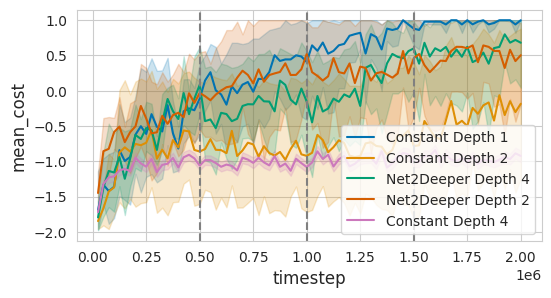

In [53]:
sns.lineplot(data=baseline_depth_1_training_process_data, x="timestep", y="mean_cost", label="Constant Depth 1")
sns.lineplot(data=baseline_depth_2_training_process_data, x="timestep", y="mean_cost", label="Constant Depth 2")
sns.lineplot(data=net2deeper_depth_4_training_process_concat_dataframe, x="timestep", y="mean_cost", label="Net2Deeper Depth 4")
sns.lineplot(data=net2deeper_depth_2_training_process_concat_dataframe, x="timestep", y="mean_cost", label="Net2Deeper Depth 2")
sns.lineplot(data=baseline_depth_4_training_process_data, x="timestep", y="mean_cost", label="Constant Depth 4")
# Add vline every 500000 timesteps
for i in range(1, int(net2deeper_depth_4_training_process_concat_dataframe["timestep"].max()/500000)):
    plt.axvline(x=i*500000, color="gray", linestyle="--")